# Simulating Python Objects and Classes using Dictionaries

## Methods as a Dictionary 

 Here we look into how objects in python work internally. So, we take an example of a simple program which creates squares and circles. We see the simulation of objects as dictionaries and later move to classes

<b>What is an Object ?</b>

An object in python is just a collection of data ( attributes ) and functions ( methods ). Everything in python is an object. It is a block of memory which contains - 

1. A type pointer (which class it belongs to) 
2. Attributes/data (your variables like .name , .side)
3. Optionally : methods (usually on the class, not on the object itself)

In other words,
Every object knows:

"I am an instance of class Square,
and here is my data: side = 5"

<b> Here is an example code snippet </b>
<pre>
class Square:
    def __init__(self, side):
        self.side = side

    def area(self):
        return self.side ** 2
        
sq = Square(5)
</pre>

When you run sq = Square(5), what builds under the hood is this - 

<pre>
Object sq
├── __class__ → Square  (points to the class definition)
├── __dict__ = {'side': 5}   (instance attributes)

</pre>

<b> Where are the methods ? </b>

1. The methods (like area) live on the class, not the object itself. 
2.  When you run ' sq.area() ' :
       <pre>
           Python does : 
           a. Is 'area' int sq.__dict__. ? <b>NO</b>
           b. Go to sq.__class__ -> Square class 
           c. Is 'area' in Square.__dict__ ? <b>YES</b> Grab Square.area

           Then python binds self = sq and calls the function 
       </pre>

3.
 <pre>
    sq (instance of Square)
        ├── __class__ → Square (the class)
        │                ├── __dict__ = { '__init__': ..., 'area': ... }  (methods)
        ├── __dict__ = { 'side': 5 }  (instance data)

 </pre>

--

So the object itself is just:

A pointer to its class.<br>
A place to store instance data.

<pre>

When you run: sq.side

Python internally does:

Look in sq.__dict__['side'] → ✅ Found → return 5

When you run: sq.area

Python internally does:

Look in sq.__dict__['area'] → ❌ Not found

Look in Square.__dict__['area'] → ✅ Found → return bound method


</pre>


### Simulation of Objects 

In [5]:
def square_perimeter(thing):
    return 4 * thing["side"]

def square_area(thing): 
    return thing["side"] **2 
    
def square_new(name, side):
    return {
        "name" : name , 
        "side" : side , 
        "perimeter" : square_perimeter , 
        "area" : square_area 
    }


In [6]:
def call(thing , method_name):
    return thing[method_name](thing)

examples = [ square_new("sq1" , 2) , square_new("sq2" , 3), square_new("sq3" , 4)] 

for ex in examples: 
    n = ex["name"]
    p = call(ex, "perimeter")
    a = call(ex , "area") 
    print(f" name {n} , perimeter {p} and area {a}")

 name sq1 , perimeter 8 and area 4
 name sq2 , perimeter 12 and area 9
 name sq3 , perimeter 16 and area 16


<p>but for all the objects we create parsing these methods is quite costly and useless </p>

### Building Classes out of Objects using additional Dictionary 

We store the methods of the Object in a dictionary called <b>class</b>, and have each individual object contain a reference to the the higher-level dictionary 

In [8]:
# for example 
def square_perimeter(thing):
    return 4 * thing["side"]

def square_area(thing): 
    return thing["side"] **2 

# dictionary simulating class 
Square = {
    "perimeter" : square_perimeter , 
    "area" : square_area, 
    "_classname" : "Square"
}

def square_new(name, side):
    return {
        "name" : name , 
        "side" : side , 
        "_class" : Square
    }

In [9]:
def call(thing , method_name):
    return thing["_class"][method_name](thing)

examples = [square_new("S1" , 1) , square_new("S2" , 2) , square_new("S3" , 3)] 

for ex in examples: 
    n = ex["name"] 
    p = call(ex , "perimeter")
    a = call(ex , "area") 
    c = ex["_class"]["_classname"]
    print(f"{n} is a {c} : perimeter={p} and area={a}")

S1 is a Square : perimeter=4 and area=1
S2 is a Square : perimeter=8 and area=4
S3 is a Square : perimeter=12 and area=9


Lets add some methods to our class 

In [19]:
# for example 

import math

def call(thing, method_name , *args):
    return thing["_class"][method_name](thing, *args) 
    
def square_perimeter(thing):
    return 4 * thing["side"]

def square_area(thing): 
    return thing["side"] **2 

def square_larger(thing , size):
    return call(thing , "area")  > size 

def circle_perimeter(thing):
    return 2 * math.pi * thing["radius"] 

def circle_area(thing): 
    return math.pi * (thing["radius"] ** 2) 

def circle_larger(thing , size):
    return call(thing , "area") > size 
    
# dictionary simulating class 
Square = {
    "perimeter": square_perimeter,
    "area": square_area,
    "_classname": "Square",
    "_parent": Shape
}

Circle = {
    "perimeter" : circle_perimeter , 
    "area" : circle_area, 
    "larger" : circle_larger ,
    "_classname" : "Circle"
}

def square_new(name, side):
    return {
        "name" : name , 
        "side" : side , 
        "_class" : Square
    }

def circle_new(name , radius):
    return {
        "name" : name,
        "radius" : radius, 
        "_class" : Circle 
    }
    
examples = [square_new("S1" , 1) , square_new("S2" , 2) , square_new("S3" , 3) , circle_new("C1" , 3) , 
           circle_new("C2" , 4) , circle_new("C3",4)] 

for ex in examples: 
    result = call(ex , "larger" , 30) 
    print(f"is {ex['name']} larger? {result}")


is S1 larger? False
is S2 larger? False
is S3 larger? False
is C1 larger? False
is C2 larger? True
is C3 larger? True


### The rise of Inheritance

Both circle_larger and square_larger are basically doing same thing, but 2 different functions. So, the tool we need is Inheritance 

Adding another method called density to the original class definition

In [22]:
class Shape:
    def __init__(self, name):
        self.name = name

    def perimeter(self):
        raise NotImplementedError("perimeter")

    def area(self):
        raise NotImplementedError("area")

    def density(self, weight):
        return weight / self.area()

class Square(Shape):
    def __init__(self, name, side):
        super().__init__(name)
        self.side = side

    def perimeter(self):
        return 4 * self.side

    def area(self):
        return self.side ** 2

class Circle(Shape):
    def __init__(self, name, radius):
        super().__init__(name)
        self.radius = radius

    def perimeter(self):
        return 2 * math.pi * self.radius

    def area(self):
        return math.pi * self.radius ** 2

In [23]:
examples = [Square("sq", 3), Circle("ci", 2)]
for ex in examples:
    n = ex.name
    d = ex.density(5)
    print(f"{n}: {d:.2f}")


sq: 0.56
ci: 0.40


Dictionary based implementation of the shape class

In [24]:
def shape_density(thing, weight):
    return weight / call(thing, "area")

Shape = {
    "density": shape_density,
    "_classname": "Shape",
    "_parent": None
}

In [30]:
# for example 

import math

def find(cls, method_name):
    while cls is not None:
        if method_name in cls:
            return cls[method_name]
        cls = cls["_parent"]
    raise NotImplementedError("method_name")
    
def call(thing, method_name , *args):
    method = find(thing["_class"] , method_name)
    return method(thing , *args) 
    
def square_perimeter(thing):
    return 4 * thing["side"]

def square_area(thing): 
    return thing["side"] **2 

def square_larger(thing , size):
    return call(thing , "area")  > size 

def circle_perimeter(thing):
    return 2 * math.pi * thing["radius"] 

def circle_area(thing): 
    return math.pi * (thing["radius"] ** 2) 

def circle_larger(thing , size):
    return call(thing , "area") > size 
    
def shape_density(thing, weight):
    return weight / call(thing, "area")

Shape = {
    "density": shape_density,
    "_classname": "Shape",
    "_parent": None
}

Square = {
    "perimeter": square_perimeter,
    "area": square_area,
    "_classname": "Square",
    "_parent": Shape
}

Circle = {
    "perimeter" : circle_perimeter , 
    "area" : circle_area, 
    "larger" : circle_larger ,
    "_classname" : "Circle",
    "_parent" : Shape 
}

def square_new(name, side):
    return {
        "name" : name , 
        "side" : side , 
        "_class" : Square
    }

def circle_new(name , radius):
    return {
        "name" : name,
        "radius" : radius, 
        "_class" : Circle 
    }
    
examples = [square_new("sq", 3), circle_new("ci", 2)]
for ex in examples:
    n = ex["name"]
    d = call(ex, "density", 5)
    print(f"{n}: {d:.2f}")

sq: 0.56
ci: 0.40


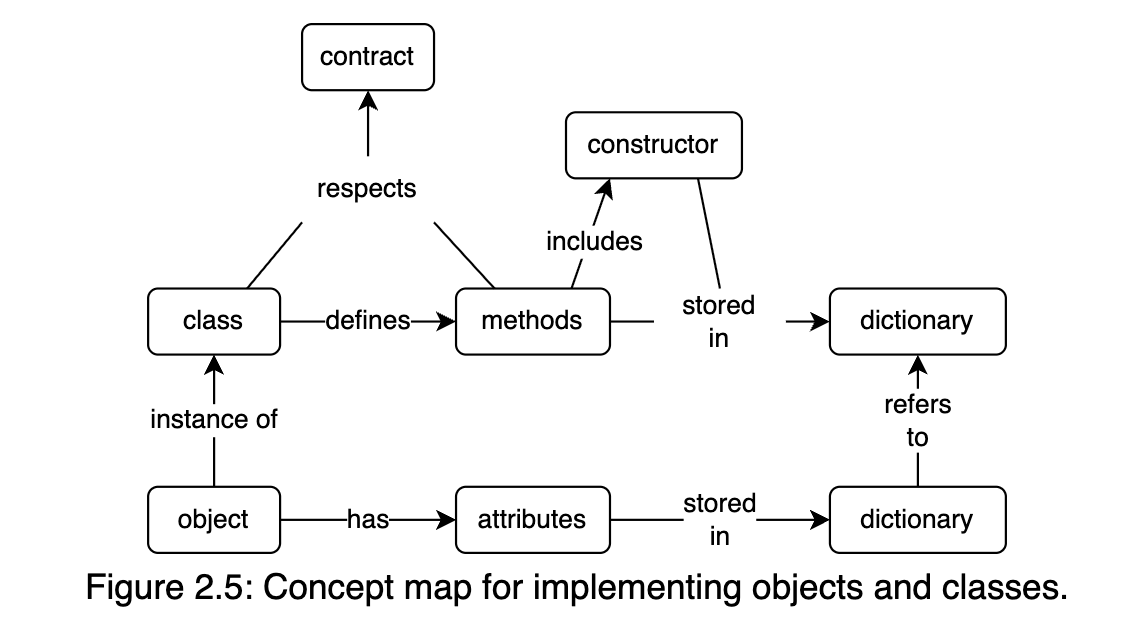